## Repeated ANOVA

Run a repeated ANOVA on week-position (DV) based on decade (IV).

In [1]:
options(warn=0)

In [7]:
library("rcompanion")
library("fastR2")
library("car")

dataFl='/Users/hansjoerg.stark/Library/Mobile Documents/com~apple~CloudDocs/Privat/Weiterbildung/Bethel-DataScience/_Projects/xmasChallenge/BethelTechChristmasDataScienceCompetition2021/Data/christmas_billboard_data.csv'
xmasSongs <- read.csv(dataFl)
View(xmasSongs)
str(xmasSongs)


url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart,year,month,day
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
http://www.billboard.com/charts/hot-100/1958-12-13,12/13/1958,83,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1,NA,69,3,1958,12,13
http://www.billboard.com/charts/hot-100/1958-12-20,12/20/1958,57,JINGLE BELL ROCK,Bobby Helms,Jingle Bell RockBobby Helms,1,NA,29,19,1958,12,20
http://www.billboard.com/charts/hot-100/1958-12-20,12/20/1958,73,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1,83,69,3,1958,12,20
http://www.billboard.com/charts/hot-100/1958-12-20,12/20/1958,86,WHITE CHRISTMAS,Bing Crosby,White ChristmasBing Crosby,1,NA,12,13,1958,12,20
http://www.billboard.com/charts/hot-100/1958-12-27,12/27/1958,44,GREEN CHRI$TMA$,Stan Freberg,Green Chri$tma$Stan Freberg,1,NA,44,2,1958,12,27
http://www.billboard.com/charts/hot-100/1958-12-27,12/27/1958,66,WHITE CHRISTMAS,Bing Crosby,White ChristmasBing Crosby,1,86,12,13,1958,12,27
http://www.billboard.com/charts/hot-100/1958-12-27,12/27/1958,69,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1,73,69,3,1958,12,27
http://www.billboard.com/charts/hot-100/1958-12-27,12/27/1958,35,JINGLE BELL ROCK,Bobby Helms,Jingle Bell RockBobby Helms,1,57,29,19,1958,12,27
http://www.billboard.com/charts/hot-100/1959-01-03,1/3/1959,45,JINGLE BELL ROCK,Bobby Helms,Jingle Bell RockBobby Helms,1,35,29,19,1959,1,3


'data.frame':	387 obs. of  13 variables:
 $ url                   : chr  "http://www.billboard.com/charts/hot-100/1958-12-13" "http://www.billboard.com/charts/hot-100/1958-12-20" "http://www.billboard.com/charts/hot-100/1958-12-20" "http://www.billboard.com/charts/hot-100/1958-12-20" ...
 $ weekid                : chr  "12/13/1958" "12/20/1958" "12/20/1958" "12/20/1958" ...
 $ week_position         : int  83 57 73 86 44 66 69 35 45 53 ...
 $ song                  : chr  "RUN RUDOLPH RUN" "JINGLE BELL ROCK" "RUN RUDOLPH RUN" "WHITE CHRISTMAS" ...
 $ performer             : chr  "Chuck Berry" "Bobby Helms" "Chuck Berry" "Bing Crosby" ...
 $ songid                : chr  "Run Rudolph RunChuck Berry" "Jingle Bell RockBobby Helms" "Run Rudolph RunChuck Berry" "White ChristmasBing Crosby" ...
 $ instance              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ previous_week_position: int  NA NA 83 NA NA 86 73 57 35 44 ...
 $ peak_position         : int  69 29 69 12 44 12 69 29 29 44 ...
 $ weeks_on_cha

Extract Decade from year

In [12]:
xmasSongs$decade <- as.integer(((xmasSongs$year)/10))*10

#### Run Repeated ANOVA

In [13]:
#DataWrangling for decade:
xmasSongs$decade <- as.character(xmasSongs$decade)
xmasSongs$decade <- as.factor(xmasSongs$decade)
xmasSongs$decade

[1] 1950 1950 1950 1950 1950 1950 1950 1950 1950 1950 1950 1950 1950 1950 1950
 [16] 1950 1950 1950 1950 1950 1950 1960 1960 1960 1960 1960 1960 1960 1960 1960
 [31] 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960
 [46] 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960
 [61] 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960
 [76] 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960
 [91] 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960
[106] 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960
[121] 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960
[136] 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960
[151] 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 1960
[166] 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970
[181] 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970
[196] 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 1980
[211] 1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 1980
[226] 1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 1980
[241] 1980 1980 1980 1980 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990
[256] 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 2000 2000
[271] 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000
[286] 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000
[301] 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000
[316] 2000 2000 2000 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010
[331] 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010
[346] 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010
[361] 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010
[376] 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010
Levels: 1950 1960 1970 1980 1990 2000 2010

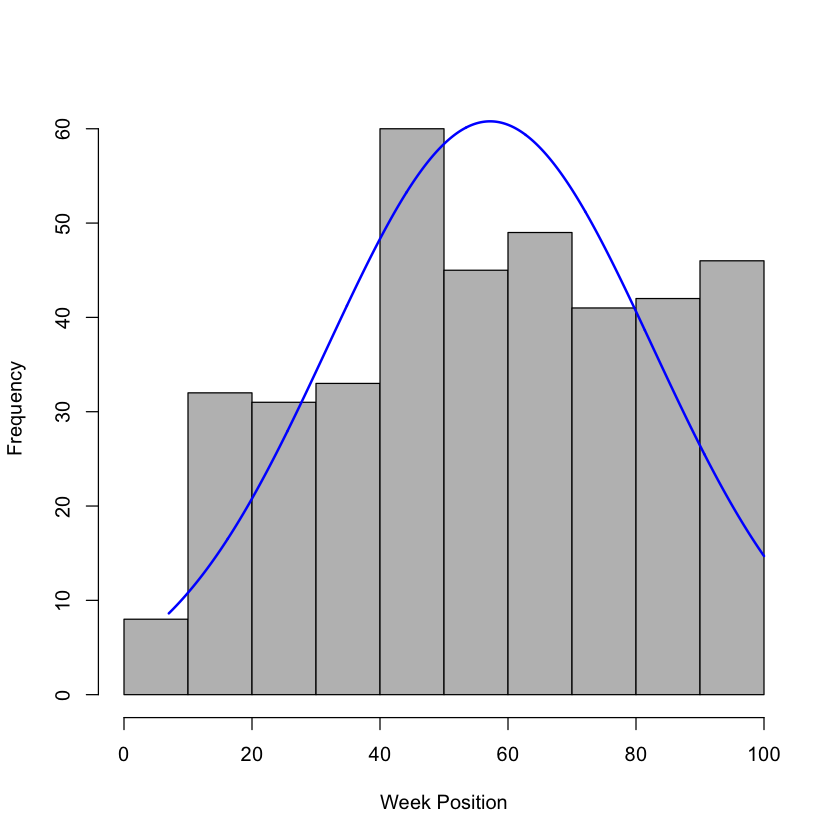

In [18]:
plotNormalHistogram(x=xmasSongs$week_position,xlab="Week Position")

Looks fairly normally distributed - no changes necessary.   

Test for Homogeneity of Variance: Run LeveneTest:

In [15]:
leveneTest(week_position ~ decade, data=xmasSongs)


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,6,2.819149,0.01071887
,380,NA,NA


p = 0.01 --> significant, p < 0.05

__HO is rejected. In other words: decades have a significant influence on the week-position of Christmas songs.__